# Clase 1 - Redes Neuronales : Una introducción

## Configuación

### Instrucciones de instalación

1. Crear un nuevo ambiente llamado deep_learning

* conda create -n deep_learning python=3.10 -y

2. Activar el ambiente

* conda activate deep_learning

3. Instalar TensorFlow y Keras (Keras viene incluido con TensorFlow)

* pip install tensorflow

4. Instalar bibliotecas adicionales para visualización y manejo de datos

* pip install matplotlib seaborn pandas numpy

5. Instalar Jupyter Lab y configurarlo para VS Code

* pip install jupyterlab ipykernel
* python -m ipykernel install --user --name=deep_learning --display-name "Python (deep_learning)"

6. Verificar las versiones instaladas (opcional)

* python -c "import tensorflow as tf; print('TensorFlow:', tf.__version__)"
* python -c "import matplotlib; print('Matplotlib:', matplotlib.__version__)"
* python -c "import seaborn; print('Seaborn:', seaborn.__version__)"
* python -c "import pandas as pd; print('Pandas:', pd.__version__)"
* python -c "import numpy as np; print('NumPy:', np.__version__)"

7. Configurar VS Code
 - Instalar el plugin "Jupyter" en VS Code.
 - Abrir un archivo `.ipynb` en VS Code.
 - Seleccionar el kernel "Python (deep_learning)" desde la parte superior derecha.

 8. (Opcional) Iniciar Jupyter Lab para comprobar el entorno

### Librerias

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

## Conceptos

### **¿Qué es?**

#### **Deep learning**

Deep learning es una rama del machine learning que utiliza redes neuronales artificiales con múltiples capas (llamadas redes neuronales profundas) para aprender patrones complejos en los datos. Funciona de la siguiente manera:

1. **Entrada de datos**:  
   Los datos, como imágenes, texto o sonidos, se ingresan en la red neuronal. Cada dato pasa por la primera capa de la red, llamada capa de entrada.

2. **Capas ocultas**:  
   Entre la capa de entrada y la de salida, hay capas ocultas que procesan los datos. Cada capa aplica transformaciones matemáticas usando neuronas conectadas entre sí. Estas neuronas calculan valores basados en pesos y sesgos, que son parámetros ajustables.

3. **Funciones de activación**:  
   Después de procesar los datos en una capa, se utiliza una función de activación para decidir qué información pasa a la siguiente capa. Esto ayuda a la red a aprender relaciones no lineales en los datos.

4. **Capa de salida**:  
   La última capa genera una predicción, como clasificar una imagen, traducir un texto o predecir un número.

5. **Entrenamiento**:  
   Para que la red aprenda, se utiliza un conjunto de datos etiquetados. El algoritmo calcula el error entre la predicción y la etiqueta real usando una función de pérdida.

6. **Optimización**:  
   El error se reduce ajustando los pesos y sesgos de las neuronas usando un proceso llamado retropropagación. Esto se realiza mediante un optimizador, como el algoritmo de gradiente descendente.

7. **Iteración**:  
   Este proceso se repite muchas veces (llamadas épocas) hasta que la red aprende a realizar buenas predicciones.

$Deep\ learning$ es útil porque puede aprender patrones muy complejos directamente de los datos, sin necesidad de extraer manualmente características importantes, como ocurría con técnicas más tradicionales.


#### **Función de activación**

Una **función de activación** es un componente fundamental en las redes neuronales. Su objetivo principal es introducir no linealidad en el modelo, permitiendo a la red aprender relaciones complejas entre las entradas y salidas.

---

**Propósito:**

1. **No linealidad**:  
   - Sin funciones de activación, una red neuronal sería equivalente a una combinación lineal, incapaz de resolver problemas complejos.
   - La función de activación permite que el modelo aprenda relaciones no lineales en los datos.

2. **Transformación de datos**:  
   - Transforma la salida de una neurona para que sea adecuada para las siguientes capas.

---

**Tipos de funciones de activación comunes:**

1. **Sigmoidea**:  
   $
   \sigma(x) = \frac{1}{1 + e^{-x}}
   $  
   - Rango: $(0, 1)$.  
   - Usos: Salidas de redes para clasificación binaria.  
   - Limitaciones: Gradiente pequeño para valores extremos, causando desvanecimiento del gradiente.

2. **Tanh (Tangente hiperbólica)**:  
   $
   \text{tanh}(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}
   $  
   - Rango: $(-1, 1)$.  
   - Usos: Problemas donde las salidas negativas tienen sentido.  
   - Ventaja: Centrada en $0$, pero también sufre desvanecimiento del gradiente.

3. **ReLU (Unidad lineal rectificada)**:  
   $
   \text{ReLU}(x) = \max(0, x)
   $  
   - Rango: $[0, \infty)$.  
   - Usos: Capas ocultas en redes profundas.  
   - Ventajas: Computacionalmente eficiente, no tiene problema de desvanecimiento del gradiente.  
   - Limitaciones: Neuronas pueden quedar "muertas" si reciben valores negativos constantemente.

4. **Leaky ReLU**:  
   $
   \text{Leaky ReLU}(x) = 
   \begin{cases} 
   x & \text{si } x > 0 \\
   \alpha x & \text{si } x \leq 0
   \end{cases}
   $  
   - Rango: $(-\infty, \infty)$.  
   - Usos: Variante de ReLU para evitar el problema de las neuronas muertas.

5. **Softmax**:  
   $
   \text{softmax}(z_i) = \frac{e^{z_i}}{\sum_{j} e^{z_j}}
   $  
   - Rango: $(0, 1)$, suma de las salidas igual a $1$.  
   - Usos: Capas de salida en clasificación multiclase.

---

**Cómo se usa en Deep Learning:**

1. **Propagación hacia adelante**:
   - Después de calcular $z = W \cdot x + b$, la función de activación se aplica para generar la salida activada:
     $
     a = f(z)
     $

2. **Capas ocultas**:
   - ReLU y sus variantes son comunes debido a su eficiencia en redes profundas.

3. **Capas de salida**:
   - Para problemas de clasificación binaria: Sigmoidea.  
   - Para clasificación multiclase: Softmax.

4. **Aprendizaje**:
   - La función de activación afecta cómo los gradientes se propagan durante el entrenamiento:
     - Funciones como ReLU permiten un flujo de gradientes más estable.
     - Funciones como Sigmoidea pueden sufrir desvanecimiento del gradiente.

---

**Ejemplo:**
En una red neuronal para clasificar imágenes:
- Entrada: Características de la imagen.  
- Capas ocultas: Usan ReLU para aprender representaciones.  
- Capa de salida: Usa Softmax para calcular las probabilidades de cada clase.

Las funciones de activación son esenciales para que las redes neuronales resuelvan problemas complejos y generen predicciones precisas.

#### **Sesgo**

El sesgo es un concepto fundamental en machine learning y estadística que puede entenderse desde varios contextos. A continuación, se explica de manera clara:

1. **Sesgo en Machine Learning**:
   - El **sesgo** se refiere a la capacidad de un modelo para capturar los patrones subyacentes en los datos.
   - Modelos con **alto sesgo** suelen ser demasiado simples y no logran capturar la complejidad de los datos, lo que lleva a un bajo rendimiento tanto en el conjunto de entrenamiento como en el de prueba (subajuste).
   - Ejemplo: Una línea recta para ajustar datos que tienen una relación cuadrática.

2. **Sesgo en Redes Neuronales**:
   - En redes neuronales, el **sesgo** es un parámetro adicional que se suma a la salida ponderada de una neurona antes de aplicar la función de activación:
     $z = W \cdot x + b$
     donde $b$ es el sesgo.
   - Este valor permite que la función de activación se desplace hacia arriba o hacia abajo, haciendo que el modelo sea más flexible para aprender.

3. **Sesgo en el contexto de datos**:
   - El **sesgo** puede ocurrir cuando los datos utilizados para entrenar el modelo no son representativos de la realidad.
   - Ejemplo: Un modelo entrenado solo con imágenes de gatos blancos podría no reconocer gatos negros.

4. **Relación con la Varianza**:
   - El sesgo está relacionado con la **varianza** en el trade-off de sesgo-varianza:
     - Alto sesgo: Modelos simples con baja flexibilidad (subajuste).
     - Baja varianza: Predicciones consistentes pero no precisas.
     - Equilibrio ideal: Un modelo con un nivel moderado de sesgo y varianza.

En resumen, el sesgo es tanto una propiedad de los modelos como un factor en la calidad de los datos. En machine learning, encontrar el balance adecuado entre sesgo y varianza es crucial para construir modelos efectivos.

#### **Función sigmoidea**

La **función sigmoidea** es una función matemática utilizada frecuentemente como función de activación en redes neuronales, especialmente en capas de salida para problemas de clasificación binaria. Su ecuación es:

$
\sigma(x) = \frac{1}{1 + e^{-x}}
$

**Propiedades principales:**

1. **Rango**: 
   - La salida de la función sigmoidea está en el intervalo $(0, 1)$.
   - Esto la hace útil para representar probabilidades.

2. **Forma de la curva**: 
   - Es una curva en forma de "S" (sigmoide), que suaviza los valores de entrada.
   - Valores de entrada ($x$) muy grandes se aproximan a $1$, y valores muy pequeños se aproximan a $0$.

3. **Derivada**: 
   - La derivada de la función sigmoidea es:
     $
     \sigma'(x) = \sigma(x) \cdot (1 - \sigma(x))
     $
   - Es computacionalmente eficiente, ya que se reutiliza el valor de $\sigma(x)$.

---

**Cómo se usa en Deep Learning:**

1. **Capas de salida**:
   - En redes neuronales para clasificación binaria, se utiliza en la capa de salida para convertir un valor arbitrario en una probabilidad.
   - Ejemplo:
     - Si $\sigma(x) = 0.8$, se interpreta como un 80% de probabilidad de pertenecer a la clase positiva.

2. **Propagación hacia adelante**:
   - La función sigmoidea transforma la salida lineal de una neurona:
     $
     z = W \cdot x + b
     $
     $
     a = \sigma(z)
     $

3. **Cálculo del error**:
   - En combinación con la entropía cruzada como función de pérdida, la sigmoidea optimiza los pesos para problemas de clasificación binaria.

4. **Limitaciones**:
   - **Desvanecimiento del gradiente**:
     - Cuando las entradas son muy grandes o muy pequeñas, el gradiente tiende a $0$, lo que puede ralentizar el aprendizaje.
   - En la práctica, se prefiere ReLU en capas ocultas por su mejor manejo de gradientes.

---

**Ejemplo:**

Imaginemos una red neuronal para detectar correos spam:
- Entrada: $x$ (características del correo).
- Salida: $z = W \cdot x + b$.
- Activación: $\sigma(z)$ genera una probabilidad, por ejemplo, $\sigma(z) = 0.9$.
- Interpretación: El correo tiene un 90% de probabilidad de ser spam.

La función sigmoidea es especialmente útil cuando queremos resultados probabilísticos o trabajar con modelos simples de clasificación binaria.

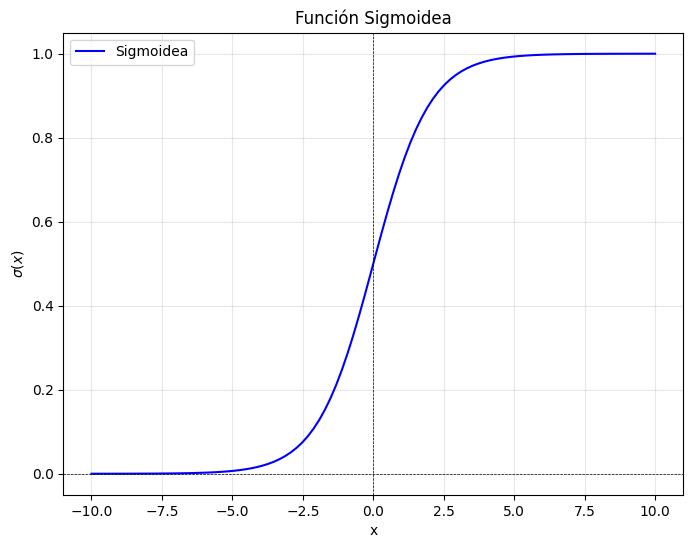

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Definir la función sigmoidea
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Generar valores para x
x = np.linspace(-10, 10, 100)

# Calcular los valores de la función sigmoidea
y = sigmoid(x)

# Graficar la función
plt.figure(figsize=(8, 6))
plt.plot(x, y, label="Sigmoidea", color="blue")
plt.title("Función Sigmoidea")
plt.xlabel("x")
plt.ylabel("$\sigma(x)$")
plt.axhline(0, color='black',linewidth=0.5, linestyle="--")
plt.axvline(0, color='black',linewidth=0.5, linestyle="--")
plt.grid(alpha=0.3)
plt.legend()
plt.show()

### **¿Cómo funciona?**

Para entender el funcionamiento de una red neuronal y cómo se construye, lo organizaremos como un flujo claro y secuencial:

1. **Definición de los componentes básicos**:
   - **Neuronas**: Cada una procesa datos de entrada y genera una salida aplicando pesos, un sesgo y una función de activación.
   - **Capas**:
     - Entrada: Recoge los datos iniciales.
     - Ocultas: Procesan los datos a través de múltiples neuronas.
     - Salida: Genera la predicción final.
   - **Conexiones**: Las neuronas de una capa están conectadas a las de la siguiente mediante pesos.
   - **Funciones de activación**: Introducen no linealidad para resolver problemas complejos.

2. **Propagación de los datos a través de la red**:
   - Los datos ingresan en la **capa de entrada**.
   - En cada **capa oculta**, se realiza el cálculo:
     - $z = W \cdot x + b$ (peso por entrada más sesgo).
     - $a = f(z)$ (aplicar función de activación como ReLU o Sigmoid).
   - El resultado pasa a la siguiente capa hasta llegar a la **capa de salida**, donde se genera una predicción.

3. **Medición del error (Función de pérdida)**:
   - Una vez obtenida la predicción, se compara con la respuesta esperada usando una función de pérdida.
   - Ejemplo de funciones de pérdida:
     - **Clasificación**: Entropía cruzada.
     - **Regresión**: Error cuadrático medio (MSE).

4. **Optimización y aprendizaje**:
   - Se usa **retropropagación** para ajustar los pesos y minimizar el error:
     - Calcular el gradiente del error respecto a los pesos.
     - Actualizar los pesos usando un optimizador, como:
       $W = W - \eta \cdot \frac{\partial L}{\partial W}$,  
       donde $\eta$ es la tasa de aprendizaje y $L$ la función de pérdida.
   - Este ajuste se repite en múltiples **épocas**, cada una pasando todos los datos.

5. **Construcción de la red neuronal**:
   - **Arquitectura**:
     - Elegir el número de capas y neuronas.
     - Definir funciones de activación (ReLU, Sigmoid, etc.).
   - **Preparación de los datos**:
     - Escalar o normalizar para mejorar el rendimiento.
     - Dividir en conjuntos de entrenamiento, validación y prueba.
   - **Entrenamiento**:
     - Alimentar los datos en lotes (batch).
     - Optimizar los pesos en cada iteración.
     - Validar para evitar sobreajuste.
   - **Evaluación**:
     - Probar con los datos de prueba y medir el rendimiento.
   - **Ajustes finales**:
     - Modificar hiperparámetros (capas, tasa de aprendizaje, etc.) si es necesario.

### **Ejemplo**

Consideremos un ejemplo más grande: clasificar imágenes de dígitos escritos a mano (del 0 al 9) usando un conjunto de datos como MNIST.
[Video aquí](https://www.youtube.com/watch?v=jKCQsndqEGQ&t=999s)

1. **Datos de entrada**:  
   Cada imagen tiene un tamaño de $28 \times 28$ píxeles, lo que equivale a $784$ píxeles en total. Estos se aplanan en un vector de entrada:  
   $\mathbf{x} = [x_1, x_2, \ldots, x_{784}]$,  
   donde cada $x_i$ representa la intensidad de un píxel (entre 0 y 255).

2. **Capa de entrada**:  
   La red tiene $784$ neuronas en la capa de entrada, una por cada píxel.

3. **Capas ocultas (procesamiento interno)**:
   Supongamos que tenemos dos capas ocultas con 128 y 64 neuronas, respectivamente:
   - **Primera capa oculta**:
     - Cada neurona combina las entradas usando pesos y sesgos:
       $z_1 = W_1 \cdot x + b_1$  
     - Aplicamos una función de activación ReLU:
       $a_1 = ReLU(z_1)$
     - Salida: $128$ valores, uno por neurona.
   - **Segunda capa oculta**:
     - Toma los $128$ valores y calcula:
       $z_2 = W_2 \cdot a_1 + b_2$  
       $a_2 = ReLU(z_2)$
     - Salida: $64$ valores.

4. **Capa de salida**:  
   La última capa tiene $10$ neuronas (una por cada dígito). Cada neurona calcula una probabilidad usando la función softmax:
   - $y_{\text{pred}_i} = \frac{e^{z_i}}{\sum_{j=1}^{10} e^{z_j}}$  
   - La red predice el dígito con mayor probabilidad.

5. **Función de pérdida**:  
   Usamos la entropía cruzada para comparar las probabilidades predichas con la etiqueta real:
   - $L = -\sum_{i=1}^{10} y_{\text{real}_i} \cdot \log(y_{\text{pred}_i})$

6. **Retropropagación y optimización**:
   - Calculamos los gradientes del error respecto a los pesos y sesgos.
   - Ajustamos los parámetros usando un optimizador como Adam o SGD:
     $W = W - \eta \cdot \frac{\partial L}{\partial W}$,  
     donde $\eta$ es la tasa de aprendizaje.

7. **Repetir el entrenamiento**:  
   Repetimos el proceso para todas las imágenes en múltiples épocas.  
   Después de suficiente entrenamiento, la red puede clasificar imágenes nuevas con alta precisión.

**Ejemplo de predicción**:  
- Imagen de entrada: Un "3".  
- Probabilidades en la capa de salida:  
  $\mathbf{y_{\text{pred}}} = [0.01, 0.02, 0.03, 0.90, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01]$  
- Predicción: La red identifica el dígito como $3$ (la probabilidad más alta es en el índice 3).

Este ejemplo demuestra cómo una red neuronal maneja datos de mayor tamaño para resolver problemas más complejos.

### Código del ejemplo

Epoch 1/5


/opt/miniconda3/envs/deep_learning/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8935 - loss: 0.3411 - val_accuracy: 0.9805 - val_loss: 0.0630
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9847 - loss: 0.0488 - val_accuracy: 0.9831 - val_loss: 0.0548
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9908 - loss: 0.0315 - val_accuracy: 0.9861 - val_loss: 0.0468
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9931 - loss: 0.0213 - val_accuracy: 0.9862 - val_loss: 0.0438
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.9951 - loss: 0.0158 - val_accuracy: 0.9899 - val_loss: 0.0411
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9875 - loss: 0.0367
Accuracy en el conjunto de prueba: 0.99
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


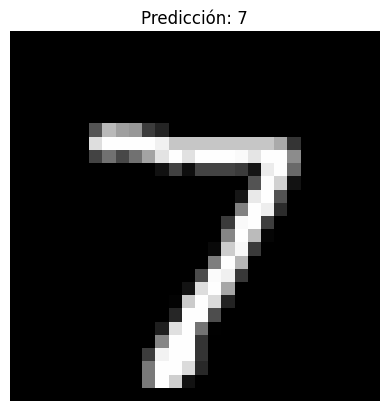

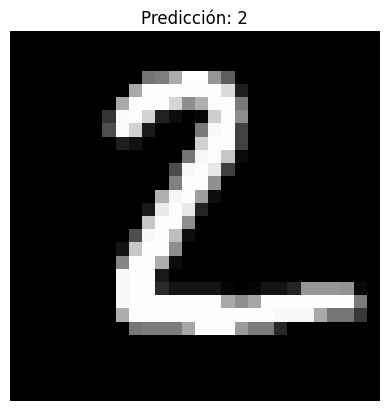

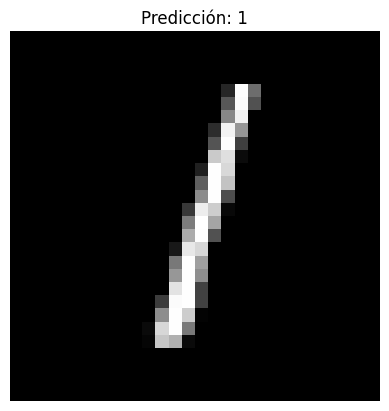

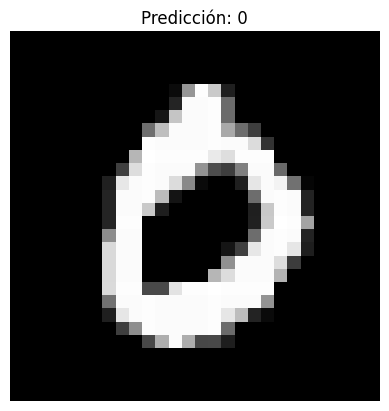

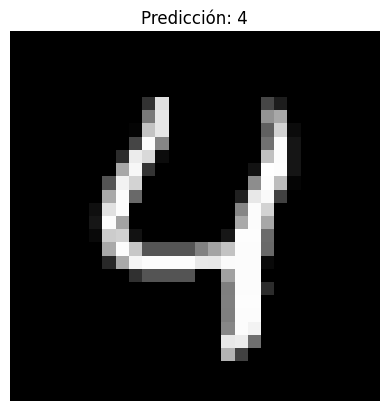

In [3]:
# Cargar el dataset MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalizar los datos
x_train = x_train / 255.0
x_test = x_test / 255.0

# Redimensionar las imágenes para añadir el canal de color (1 para escala de grises)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Convertir las etiquetas en formato one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Crear el modelo
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')  # 10 clases (0-9)
])

# Compilar el modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(x_train, y_train, epochs=5, validation_split=0.25)

# Evaluar el modelo en el conjunto de prueba
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Accuracy en el conjunto de prueba: {test_accuracy:.2f}")

# Visualizar algunas predicciones
predictions = model.predict(x_test)

# Mostrar las primeras 5 imágenes junto con sus predicciones
for i in range(5):
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicción: {predictions[i].argmax()}")
    plt.axis('off')
    plt.show()
